In [535]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [536]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [537]:
NUM_CLASSES = 23

# Dataset reading

In [538]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [539]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [541]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [542]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [543]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_50 (Dropout)        (None, 86)                0         
                                                                 
 dense_75 (Dense)            (None, 100)               8700      
                                                                 
 dropout_51 (Dropout)        (None, 100)               0         
                                                                 
 dense_76 (Dense)            (None, 50)                5050      
                                                                 
 dense_77 (Dense)            (None, 23)                1173      
                                                                 
Total params: 14923 (58.29 KB)
Trainable params: 14923 (58.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [544]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [545]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [546]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2300
13/17 [=====================>........] - ETA: 0s - loss: 3.0452 - accuracy: 0.0974
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 2s 46ms/step - loss: 3.0153 - accuracy: 0.1134 - val_loss: 2.7589 - val_accuracy: 0.1927
Epoch 2/2300
 7/17 [===========>..................] - ETA: 0s - loss: 2.7444 - accuracy: 0.2009

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/17 [=====================>........] - ETA: 0s - loss: 2.6838 - accuracy: 0.2145
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 2.6699 - accuracy: 0.2054 - val_loss: 2.4578 - val_accuracy: 0.2029
Epoch 3/2300
13/17 [=====================>........] - ETA: 0s - loss: 2.4246 - accuracy: 0.2308
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 21ms/step - loss: 2.4153 - accuracy: 0.2326 - val_loss: 2.2191 - val_accuracy: 0.2715
Epoch 4/2300
14/17 [=======================>......] - ETA: 0s - loss: 2.2269 - accuracy: 0.2600
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 2.2184 - accuracy: 0.2613 - val_loss: 2.0049 - val_accuracy: 0.3460
Epoch 5/2300
15/17 [=========================>....] - ETA: 0s - loss: 2.0450 - accuracy: 0.3354
Epoch 5: sa

14/17 [=======================>......] - ETA: 0s - loss: 0.6625 - accuracy: 0.7478
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.6569 - accuracy: 0.7470 - val_loss: 0.3378 - val_accuracy: 0.8555
Epoch 30/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.6399 - accuracy: 0.7599
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.6380 - accuracy: 0.7586 - val_loss: 0.3299 - val_accuracy: 0.9036
Epoch 31/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.6067 - accuracy: 0.7651
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.6152 - accuracy: 0.7611 - val_loss: 0.3269 - val_accuracy: 0.8832
Epoch 32/2300
13/17 [=====================>........] - ETA: 0s - loss: 0.6206 - accuracy: 0.7614
Epoch

Epoch 56/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.4239 - accuracy: 0.8349
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.4225 - accuracy: 0.8375 - val_loss: 0.1974 - val_accuracy: 0.9372
Epoch 57/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.4209 - accuracy: 0.8380
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.4231 - accuracy: 0.8360 - val_loss: 0.1900 - val_accuracy: 0.9489
Epoch 58/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.4323 - accuracy: 0.8354
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.4319 - accuracy: 0.8316 - val_loss: 0.1917 - val_accuracy: 0.9431
Epoch 59/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.4216 - accuracy

Epoch 83/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.3885 - accuracy: 0.8443
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 0.3823 - accuracy: 0.8472 - val_loss: 0.1468 - val_accuracy: 0.9474
Epoch 84/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.3343 - accuracy: 0.8735
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.3343 - accuracy: 0.8735 - val_loss: 0.1460 - val_accuracy: 0.9445
Epoch 85/2300
17/17 [==============================] - ETA: 0s - loss: 0.3339 - accuracy: 0.8652
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.3339 - accuracy: 0.8652 - val_loss: 0.1455 - val_accuracy: 0.9489
Epoch 86/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.3318 - accuracy

Epoch 110/2300
 9/17 [==============>...............] - ETA: 0s - loss: 0.2980 - accuracy: 0.8689
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.3077 - accuracy: 0.8715 - val_loss: 0.1194 - val_accuracy: 0.9474
Epoch 111/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2816 - accuracy: 0.8833
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.2808 - accuracy: 0.8852 - val_loss: 0.1196 - val_accuracy: 0.9693
Epoch 112/2300
 9/17 [==============>...............] - ETA: 0s - loss: 0.2651 - accuracy: 0.8906
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2824 - accuracy: 0.8813 - val_loss: 0.1208 - val_accuracy: 0.9679
Epoch 113/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2990 - a

Epoch 137/2300
 9/17 [==============>...............] - ETA: 0s - loss: 0.2567 - accuracy: 0.8958
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.2625 - accuracy: 0.8925 - val_loss: 0.1082 - val_accuracy: 0.9708
Epoch 138/2300
17/17 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.8920
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 0.2594 - accuracy: 0.8920 - val_loss: 0.1054 - val_accuracy: 0.9650
Epoch 139/2300
17/17 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.8905
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2631 - accuracy: 0.8905 - val_loss: 0.1012 - val_accuracy: 0.9766
Epoch 140/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2595 - a

Epoch 164/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2590 - accuracy: 0.8953
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2584 - accuracy: 0.8954 - val_loss: 0.0966 - val_accuracy: 0.9766
Epoch 165/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2382 - accuracy: 0.9104
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2397 - accuracy: 0.9095 - val_loss: 0.0949 - val_accuracy: 0.9737
Epoch 166/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2254 - accuracy: 0.9089
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.2283 - accuracy: 0.9080 - val_loss: 0.0912 - val_accuracy: 0.9825
Epoch 167/2300
13/17 [=====================>........] - ETA: 0s - loss: 0.2405 - a

Epoch 191/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.2105 - accuracy: 0.9180
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2131 - accuracy: 0.9168 - val_loss: 0.0808 - val_accuracy: 0.9810
Epoch 192/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2452 - accuracy: 0.9036
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.2453 - accuracy: 0.9041 - val_loss: 0.0839 - val_accuracy: 0.9854
Epoch 193/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.2385 - accuracy: 0.8970
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2386 - accuracy: 0.8968 - val_loss: 0.0858 - val_accuracy: 0.9723
Epoch 194/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2204 - a

Epoch 218/2300
13/17 [=====================>........] - ETA: 0s - loss: 0.2088 - accuracy: 0.9141
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 0.2151 - accuracy: 0.9105 - val_loss: 0.0848 - val_accuracy: 0.9796
Epoch 219/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.2222 - accuracy: 0.9135
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 0.2197 - accuracy: 0.9134 - val_loss: 0.0798 - val_accuracy: 0.9810
Epoch 220/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.2154 - accuracy: 0.9185
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 0.2213 - accuracy: 0.9182 - val_loss: 0.0815 - val_accuracy: 0.9869
Epoch 221/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2086 - a

Epoch 245/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2016 - accuracy: 0.9182
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.2051 - accuracy: 0.9178 - val_loss: 0.0710 - val_accuracy: 0.9869
Epoch 246/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2240 - accuracy: 0.9156
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.9148 - val_loss: 0.0710 - val_accuracy: 0.9839
Epoch 247/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9297
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.1946 - accuracy: 0.9260 - val_loss: 0.0698 - val_accuracy: 0.9869
Epoch 248/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.2509 - accu

Epoch 272/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2467 - accuracy: 0.9047
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2461 - accuracy: 0.9051 - val_loss: 0.0663 - val_accuracy: 0.9912
Epoch 273/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1979 - accuracy: 0.9302
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.2023 - accuracy: 0.9265 - val_loss: 0.0644 - val_accuracy: 0.9883
Epoch 274/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.2080 - accuracy: 0.9194
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 0.2075 - accuracy: 0.9197 - val_loss: 0.0657 - val_accuracy: 0.9839
Epoch 275/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1893 - a

Epoch 299/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.1921 - accuracy: 0.9213
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1876 - accuracy: 0.9217 - val_loss: 0.0641 - val_accuracy: 0.9825
Epoch 300/2300
 8/17 [=============>................] - ETA: 0s - loss: 0.1619 - accuracy: 0.9336
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 11ms/step - loss: 0.1638 - accuracy: 0.9401 - val_loss: 0.0601 - val_accuracy: 0.9854
Epoch 301/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.1895 - accuracy: 0.9297
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.1891 - accuracy: 0.9299 - val_loss: 0.0603 - val_accuracy: 0.9898
Epoch 302/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1985 - ac

Epoch 326/2300
13/17 [=====================>........] - ETA: 0s - loss: 0.2133 - accuracy: 0.9147
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 0.2018 - accuracy: 0.9226 - val_loss: 0.0581 - val_accuracy: 0.9912
Epoch 327/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1736 - accuracy: 0.9312
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1797 - accuracy: 0.9270 - val_loss: 0.0579 - val_accuracy: 0.9912
Epoch 328/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.2060 - accuracy: 0.9146
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1950 - accuracy: 0.9212 - val_loss: 0.0617 - val_accuracy: 0.9854
Epoch 329/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1725 - a

Epoch 353/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.1734 - accuracy: 0.9336
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1746 - accuracy: 0.9328 - val_loss: 0.0530 - val_accuracy: 0.9912
Epoch 354/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1684 - accuracy: 0.9349
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1696 - accuracy: 0.9343 - val_loss: 0.0568 - val_accuracy: 0.9927
Epoch 355/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.1818 - accuracy: 0.9258
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 0.1796 - accuracy: 0.9260 - val_loss: 0.0574 - val_accuracy: 0.9869
Epoch 356/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1860 - a

Epoch 380/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.1657 - accuracy: 0.9425
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 0.1705 - accuracy: 0.9411 - val_loss: 0.0522 - val_accuracy: 0.9912
Epoch 381/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.1498 - accuracy: 0.9531
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.1730 - accuracy: 0.9348 - val_loss: 0.0525 - val_accuracy: 0.9912
Epoch 382/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.1720 - accuracy: 0.9141
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.1593 - accuracy: 0.9367 - val_loss: 0.0545 - val_accuracy: 0.9912
Epoch 383/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.1696 - accu

Epoch 407/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.1684 - accuracy: 0.9336
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1680 - accuracy: 0.9338 - val_loss: 0.0482 - val_accuracy: 0.9927
Epoch 408/2300
 9/17 [==============>...............] - ETA: 0s - loss: 0.1768 - accuracy: 0.9349
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.1611 - accuracy: 0.9436 - val_loss: 0.0505 - val_accuracy: 0.9898
Epoch 409/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1594 - accuracy: 0.9438
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1556 - accuracy: 0.9445 - val_loss: 0.0514 - val_accuracy: 0.9839
Epoch 410/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.1667 - a

Epoch 434/2300
 9/17 [==============>...............] - ETA: 0s - loss: 0.1513 - accuracy: 0.9392
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1464 - accuracy: 0.9426 - val_loss: 0.0486 - val_accuracy: 0.9927
Epoch 435/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1807 - accuracy: 0.9198
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 0.1786 - accuracy: 0.9212 - val_loss: 0.0594 - val_accuracy: 0.9766
Epoch 436/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.1576 - accuracy: 0.9401
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.1619 - accuracy: 0.9392 - val_loss: 0.0513 - val_accuracy: 0.9912
Epoch 437/2300
14/17 [=======================>......] - ETA: 0s - loss: 0.1602 - a

In [547]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 14ms/step - loss: 0.0483 - accuracy: 0.9898


In [548]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [549]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 156ms/step
[2.1136081e-11 1.4639060e-14 8.3968216e-01 3.9580726e-12 9.4445204e-14
 6.4863637e-04 9.2726566e-08 4.6815813e-09 4.0366477e-04 2.0461707e-10
 2.6482454e-13 3.9852954e-10 4.6262026e-12 8.5737856e-10 5.8455325e-06
 1.5925533e-01 2.8628662e-07 2.9544403e-12 3.0440849e-06 4.3519734e-07
 4.7182007e-07 5.1901240e-11 9.9407234e-13]
2


# Confusion matrix

22/22 [==============================] - 0s 3ms/step


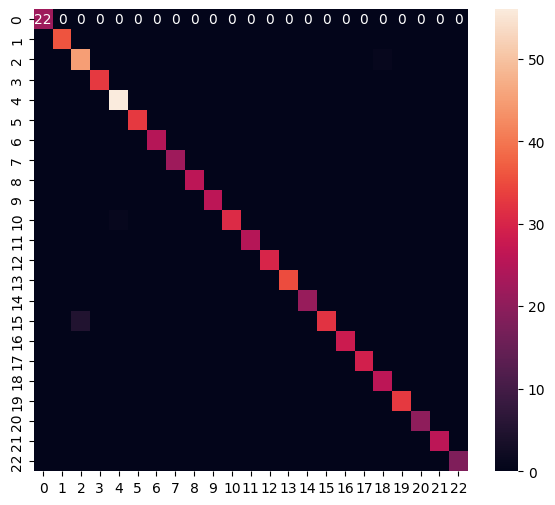

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        36
           2       0.90      0.98      0.94        46
           3       1.00      1.00      1.00        33
           4       0.98      1.00      0.99        56
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        26
          10       1.00      0.97      0.98        32
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        21
          15       1.00      0.86      0.93        37
          16       1.00      1.00      1.00        28
     

In [550]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [551]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [552]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmplvfg6d0i\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmplvfg6d0i\assets


17792

# Inference test

In [553]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [554]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [555]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [556]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [557]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0945490e-11 1.5850561e-14 8.1832910e-01 4.0213002e-12 7.2462686e-14
 6.4357719e-04 8.8905580e-08 5.2324816e-09 4.0595830e-04 2.1557027e-10
 2.8081969e-13 4.2778966e-10 4.3521449e-12 8.2981166e-10 5.3331983e-06
 1.8061209e-01 2.6205703e-07 2.4963293e-12 2.6740238e-06 4.8993769e-07
 5.1528940e-07 5.6326110e-11 9.1881082e-13]
2
